## 1. Understanding Power-Law Distributions

### 1.1 What is a Power-Law Distribution?

A power law distribution occurs when the probability of observing a value $x$ is proportional to a power of that value:

$$p(x) \propto x^{-\alpha}$$

where $\alpha > 1$ is the **scaling parameter** (or exponent).

For a continuous power law distribution, the probability density function (PDF) is given by:

$$p(x) = \frac{\alpha-1}{x_{min}}\left(\frac{x}{x_{min}}\right)^{-\alpha}$$

where $x_{min}$ is the lower bound from which the power-law behavior applies.

### 1.2 Key Properties of Power-Law Distributions

1. **Scale-free behavior**: The ratio $p(x_1)/p(x_2) = (x_1/x_2)^{-\alpha}$ depends only on the ratio of $x_1$ and $x_2$, not their absolute values.

2. **Heavy tail**: Power laws have much heavier tails than exponential distributions, meaning extreme events occur more frequently.

3. **Infinite variance**: When $1 < \alpha \leq 3$, the distribution has infinite variance (for $\alpha \leq 2$, even the mean is infinite).

4. **80/20 principle**: In many power-law distributions, roughly 80% of effects come from 20% of causes (Pareto principle).

### 1.3 The CCDF (Complementary Cumulative Distribution Function)

The CCDF is defined as:

$$P(X > x) = 1 - F(x)$$

where $F(x)$ is the cumulative distribution function (CDF).

For a power law distribution with exponent $\alpha$, the CCDF follows:

$$P(X > x) \propto x^{-(\alpha-1)}$$

**Why use CCDF instead of PDF for visualization?**

1. CCDFs are less noisy than PDFs, especially in the tail region
2. No binning is required (avoiding bin size selection issues)
3. Log-log plots of CCDFs for power laws appear as straight lines
4. The slope of this line is $-(\alpha-1)$, allowing for easy visual estimation of $\alpha$

In [33]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compute_ccdf(degrees):
    """
    Given a list/array of degrees, compute the CCDF.
    
    Parameters:
        degrees (list or array): List of node degrees
        
    Returns:
        unique_degrees (np.array): Sorted unique degree values
        ccdf (np.array): Complementary CDF values (P(K >= k))
    """
    unique, counts = np.unique(degrees, return_counts=True)
    probs = counts / counts.sum()
    
    # Sort values by degree
    sorted_indices = np.argsort(unique)
    unique_sorted = unique[sorted_indices]
    probs_sorted = probs[sorted_indices]
    
    # CCDF = Probability that Degree >= k
    ccdf = np.flip(np.cumsum(np.flip(probs_sorted)))
    
    return unique_sorted, ccdf

def plot_ccdf(data, label=None, color=None, alpha=1.0):
    """
    Plot the Complementary Cumulative Distribution Function (CCDF) of data on a log-log scale.
    
    Parameters:
    -----------
    data : array-like
        The data for which to compute and plot the CCDF.
    label : str, optional
        The label for the plot legend.
    color : str, optional
        The color to use for the plot markers.
    alpha : float, default=1.0
        The transparency level of the plot markers (0.0 to 1.0).
    
    Returns:
    --------
    sorted_data : numpy.ndarray
        The sorted unique values from the input data.
    ccdf : numpy.ndarray
        The CCDF values corresponding to sorted_data (P(X > x)).
    """
    # Compute the CCDF values using the helper function
    sorted_data, ccdf = compute_ccdf(data)
    
    # Plot the CCDF on a log-log scale with dot markers
    plt.loglog(sorted_data, ccdf, '.', markersize=3, alpha=alpha, label=label, color=color)
    
    # Return the data points that make up the CCDF plot
    return sorted_data, ccdf

In [34]:
def generate_power_law(alpha, xmin=1, size=10000):
    """
    Generate random samples from a power law distribution using inverse transform sampling.
    
    For a power law distribution p(x) ∝ x^(-alpha), this function generates random
    samples by applying the inverse CDF method.
    
    Parameters:
    -----------
    alpha : float
        The power law exponent (alpha > 1). Controls how quickly the tail decays.
        Smaller values create heavier tails.
    xmin : float, default=1
        The minimum value of the distribution (lower bound).
    size : int, default=10000
        Number of samples to generate.
        
    Returns:
    --------
    np.array
        Array of power-law distributed values.
        
    Notes:
    ------
    The inverse CDF method transforms uniform random numbers to the target distribution.
    For power laws, the formula is: x = xmin * (1-r)^(-1/(alpha-1)) where r is uniform(0,1).
    """
    # Using inverse transform sampling
    r = np.random.random(size=size)
    return xmin * (1 - r) ** (-1 / (alpha - 1))

In [35]:
# Generate power law distributions with different exponents
alphas = [2, 2.5, 3.0, 3.5]
colors = ['blue', 'green', 'red', 'purple']
markers = ['o', 's', '^', 'd']  # Different marker styles for each line

# List to store the generated data and their CCDF values
all_data = []
all_x = []
all_ccdf = []
all_theory_x = []
all_theory_y = []

# Generate data and compute CCDFs
for i, alpha in enumerate(alphas):
    # Generate power law distributed data
    data = generate_power_law(alpha, xmin=1, size=1000)
    all_data.append(data)
    
    # Calculate CCDF: P(X > x)
    x, ccdf = compute_ccdf(data)
    all_x.append(x)
    all_ccdf.append(ccdf)
    
    # Calculate theoretical power law line
    x_range = np.logspace(np.log10(min(x)), np.log10(max(x)), 100)
    y_theory = (x_range/min(x))**(-(alpha-1))
    y_theory = y_theory * ccdf[0]/y_theory[0]  # Normalize to match at xmin
    all_theory_x.append(x_range)
    all_theory_y.append(y_theory)

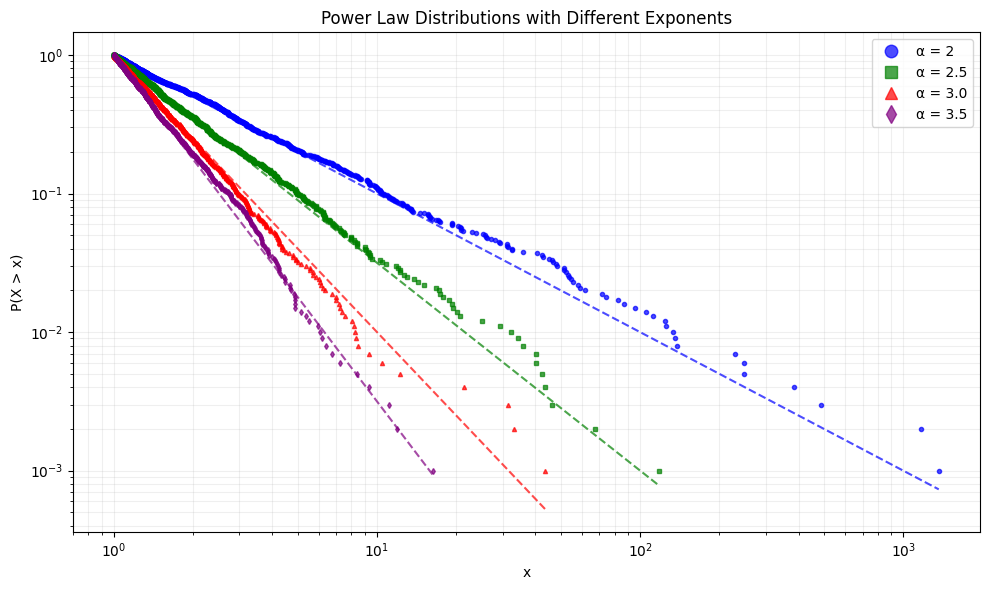

In [36]:
# Plot the CCDFs and theoretical lines
plt.figure(figsize=(10, 6))

for i, alpha in enumerate(alphas):
    # Plot empirical data points
    plt.loglog(all_x[i], all_ccdf[i], marker=markers[i], markersize=3, alpha=0.7, 
               color=colors[i], label=f'α = {alpha}', linestyle='None')
    
    # Plot the theoretical line
    plt.loglog(all_theory_x[i], all_theory_y[i], '--', color=colors[i], alpha=0.7)

plt.xlabel('x')
plt.ylabel('P(X > x)')
plt.legend(markerscale=3)  # Makes markers in legend 3x bigger
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.title('Power Law Distributions with Different Exponents')
plt.tight_layout()
plt.show()

### 1.4 Identifying Power Laws in Data

When analyzing real-world data, identifying a genuine power law can be challenging. Here are the key steps:

1. **Visual inspection**: Plot the data on a log-log scale and look for a straight line.

2. **Determine $x_{min}$**: Find the minimum value from which the power law behavior begins.

3. **Estimate $\alpha$**: Using Maximum Likelihood Estimation (MLE):
   $$\alpha = 1 + n \left[ \sum_{i=1}^{n} \ln \frac{x_i}{x_{min}} \right]^{-1}$$
   where $n$ is the number of data points with $x_i \geq x_{min}$.

4. **Goodness-of-fit test**: Compare your data to synthetic power law data using the Kolmogorov-Smirnov test.

5. **Model comparison**: Compare the power law fit with alternative distributions (e.g., log-normal, exponential).

---
The Kolmogorov-Smirnov test is a statistical method that helps us determine how well a theoretical distribution fits our empirical data.

#### What is the KS distance?

The KS distance is the **maximum difference** between two cumulative distribution functions (CDFs):

$$D = \max_x |F_{empirical}(x) - F_{theoretical}(x)|$$

where:
- $F_{empirical}(x)$ is the empirical CDF of our data
- $F_{theoretical}(x)$ is the theoretical CDF of the fitted distribution

#### Visual Intuition

Imagine plotting both CDFs on the same graph:
- The empirical CDF looks like a staircase
- The theoretical CDF is a smooth curve
- The KS distance is simply the largest vertical gap between these two curves

#### Interpreting the KS Distance

- **Smaller values** (closer to 0): The empirical data closely follows the theoretical distribution
- **Larger values** (closer to 1): The empirical data deviates significantly from the theoretical distribution
---

The Python library `powerlaw` can help with these steps.

## 2. The powerlaw Package: A Guide

The `powerlaw` package is a Python implementation of the methods described in the paper by Clauset, Shalizi, and Newman (2009) for analyzing heavy-tailed distributions. Here's what students should know about this powerful tool:

### 2.1 Core Features

1. **Rigorous Fitting**: Provides maximum likelihood estimators for power-law distributions, properly accounting for discrete vs. continuous data.
2. **Automatic xmin Detection**: Uses the Kolmogorov-Smirnov statistic to determine the minimum value from which the power-law behavior starts (`xmin`).
3. **Distribution Comparison**: Tests whether a power law is the best fit compared to exponential, log-normal, and other distributions.
4. **Visualization Tools**: Creates publication-quality figures to illustrate distribution fits.

### 2.2 Key Functions and Methods

- **Fit(data, discrete=False)**: Main class for fitting power-law distributions.
    - `alpha`: The fitted exponent.
    - `xmin`: The minimum value where power-law behavior begins.
    - `D`: Kolmogorov-Smirnov statistic (goodness of fit).

- **Distribution Comparison**:
    - `fit.distribution_compare('power_law', 'lognormal')`: Compares power law to alternatives using likelihood ratio tests.

- **Plotting**:
    - `fit.plot_pdf()`: Plots the probability density function.
    - `fit.plot_ccdf()`: Plots the complementary cumulative distribution function.

### 2.3 Understanding Workflow

1. **Data Preparation**: Ensure your data is in a format suitable for analysis (e.g., a list or NumPy array of values).
2. **Fitting the Distribution**: Use `powerlaw.Fit` to fit the data and extract key parameters like `alpha` and `xmin`.
3. **Visualization**: Plot the PDF or CCDF to visually inspect the fit and compare it with theoretical expectations.
4. **Model Comparison**: Use `distribution_compare` to test whether a power law is the best fit or if another distribution (e.g., log-normal) is more appropriate.
5. **Interpret Results**: Analyze the fitted parameters and compare them with theoretical predictions or results from other datasets.

By following these steps, students can rigorously analyze heavy-tailed distributions and determine whether a power law is the best fit for their data.


In [37]:
import powerlaw 

# Generate synthetic data with known parameters
true_alpha = 2.5
true_xmin = 5
n_samples = 5000

# Generate truncated data (values >= xmin)
np.random.seed(42)  # For reproducibility
data = generate_power_law(true_alpha, xmin=true_xmin, size=n_samples)


In [38]:
# Fit using the powerlaw package
fit = powerlaw.Fit(data, verbose=True)

Calculating best minimal value for power law fit


In [39]:
# Display the estimated parameters
print(f"True parameters: α = {true_alpha}, xmin = {true_xmin}")
print(f"Estimated parameters: α = {fit.alpha:.4f}, xmin = {fit.xmin:.4f}")
print(f"Standard error on α: {fit.sigma:.4f}")

True parameters: α = 2.5, xmin = 5
Estimated parameters: α = 2.5155, xmin = 5.0000
Standard error on α: 0.0214


In [40]:
# Prepare data for CCDF plot
filtered_data = data[data >= fit.xmin]
x_fit, y_fit = compute_ccdf(filtered_data)

# Calculate theoretical power law
x_theory = np.logspace(np.log10(fit.xmin), np.log10(max(data)), 100)
y_theory = (x_theory/fit.xmin)**(-(fit.alpha-1))
# Find the CCDF value at xmin
xmin_idx = np.searchsorted(x_fit, fit.xmin)
if xmin_idx >= len(y_fit):
    xmin_idx = len(y_fit) - 1
y_theory = y_theory * y_fit[xmin_idx]/y_theory[0]  # Normalize to match at xmin

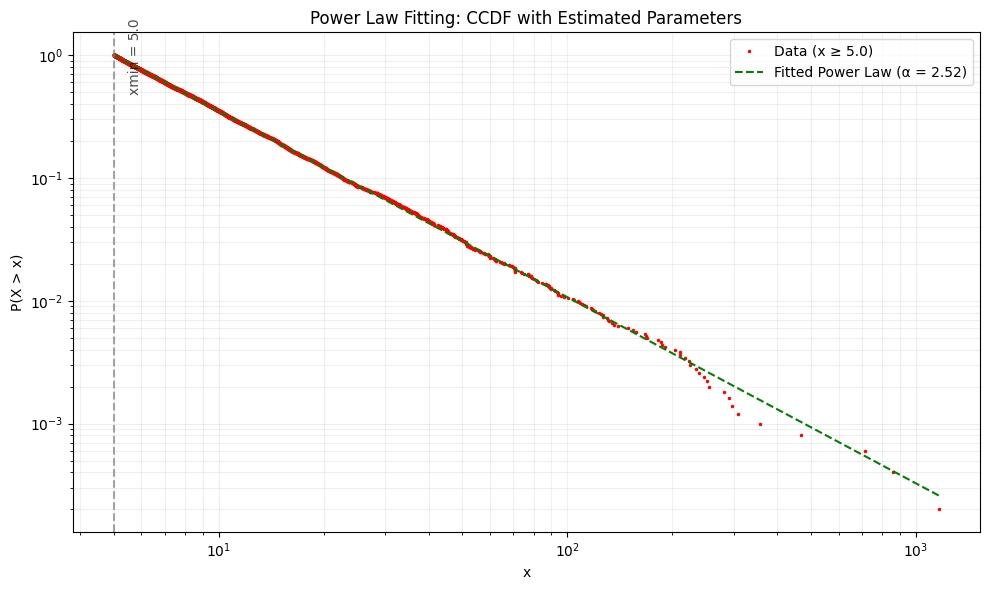

In [41]:
# Plot the CCDF with the fitted power law
plt.figure(figsize=(10, 6))

# Fitted power law from xmin
plt.loglog(x_fit, y_fit, '.', markersize=3, label=f'Data (x ≥ {fit.xmin:.1f})', color='red')

# Theoretical power law
plt.loglog(x_theory, y_theory, '--', color='green', 
           label=f'Fitted Power Law (α = {fit.alpha:.2f})')

# Vertical line at xmin
plt.axvline(x=fit.xmin, color='gray', linestyle='--', alpha=0.7)
plt.text(fit.xmin*1.1, 0.5, f'xmin = {fit.xmin:.1f}', rotation=90, alpha=0.7)

plt.xlabel('x')
plt.ylabel('P(X > x)')
plt.title('Power Law Fitting: CCDF with Estimated Parameters')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.tight_layout()
plt.show()

### 3.1 Power Law Goodness-of-Fit Testing: Understanding p-values

In power law fitting, the p-value interpretation is **opposite** to conventional hypothesis testing:

- **In conventional tests**: We seek p < 0.05 to reject a null hypothesis.
- **In power law fitting**: We want p > 0.1 to accept the power law as plausible.

#### The bootstrap test procedure:

1. We start by fitting a power law to our data, obtaining parameters α and xmin
2. We generate many synthetic datasets from the fitted power law model
3. We fit each synthetic dataset and compute the KS distance
4. We compare the KS distance for the real data with the distribution of KS distances from synthetic data

#### Interpreting the p-value:

- **p > 0.1**: The empirical data's deviation from power law is similar to what we'd expect if the data truly followed a power law. The power law is a plausible model.

- **p ≤ 0.1**: The empirical data deviates more from the theoretical power law than we'd expect by chance. The power law is not a good fit.

This is because the null hypothesis here is "the data follows a power law distribution," and we want to avoid rejecting this hypothesis if the power law is indeed a good fit.

#### For our synthetic data example:

Since we generated our data from a power law distribution, we expect to find a high p-value, confirming that our fitting procedure correctly identifies the underlying distribution.

In [42]:
# Perform a goodness-of-fit test for the power law
# Calculate KS distance between data and fitted power law
gof_results = fit.power_law.KS(fit.data)
print(f"KS distance: {gof_results:.4f}")
print(f"Interpretation: This represents the maximum difference between the empirical CDF and the fitted power law CDF.")
print(f"              Smaller values (closer to 0) indicate a better fit.")
print()

# Run bootstrap test to calculate p-value
# This generates synthetic datasets from our fitted power law model,
# and compares their KS distances to the KS distance of our real data
bootstrap_result = fit.distribution_compare('power_law', 'power_law', nested=True)

# The 'nested=True' parameter is crucial here:
# - When comparing a distribution to itself with nested=True, the function performs a bootstrap goodness-of-fit test
# - It generates multiple synthetic datasets from the fitted power law model
# - For each synthetic dataset, it calculates a KS distance
# - The p-value represents the fraction of synthetic datasets with KS distance larger than our empirical data
# - This tells us if our data's deviation from a perfect power law is within expected statistical fluctuations

# Extract the p-value from the tuple (R value isn't relevant for this test)
R, p_value = bootstrap_result

print(f"Goodness of fit p-value: {p_value:.4f}")

# Interpret the results
if p_value > 0.1:
    print("\nResult: The power law is a plausible fit for our data (p > 0.1)")
    print("This means we cannot reject the hypothesis that our data follows a power law.")
else:
    print("\nResult: The power law is not a plausible fit for our data (p ≤ 0.1)")
    print("We should consider alternative distributions that might better describe our data.")


KS distance: 0.0071
Interpretation: This represents the maximum difference between the empirical CDF and the fitted power law CDF.
              Smaller values (closer to 0) indicate a better fit.

Goodness of fit p-value: 1.0000

Result: The power law is a plausible fit for our data (p > 0.1)
This means we cannot reject the hypothesis that our data follows a power law.


Assuming nested distributions


### 3.2 Comparing Alternative Distributions

Even if a power law is a plausible fit, other heavy-tailed distributions might fit the data better. We use log-likelihood ratio tests to compare the power law with alternative distributions like:

- **Exponential**: $p(x) \propto e^{-\lambda x}$
- **Lognormal**: $p(x) \propto \frac{1}{x} e^{-\frac{(\ln x - \mu)^2}{2\sigma^2}}$
- **Truncated power law**: $p(x) \propto x^{-\alpha} e^{-\lambda x}$
- **Stretched exponential**: $p(x) \propto x^{\beta-1} e^{-\lambda x^\beta}$

For each comparison, we calculate:

- **R**: Log-likelihood ratio between power law and alternative
   - R > 0: Power law is favored
   - R < 0: Alternative distribution is favored

- **p-value**: Statistical significance of the likelihood ratio test
   - p < 0.05: The sign of R is statistically significant
   - p ≥ 0.05: The test is inconclusive

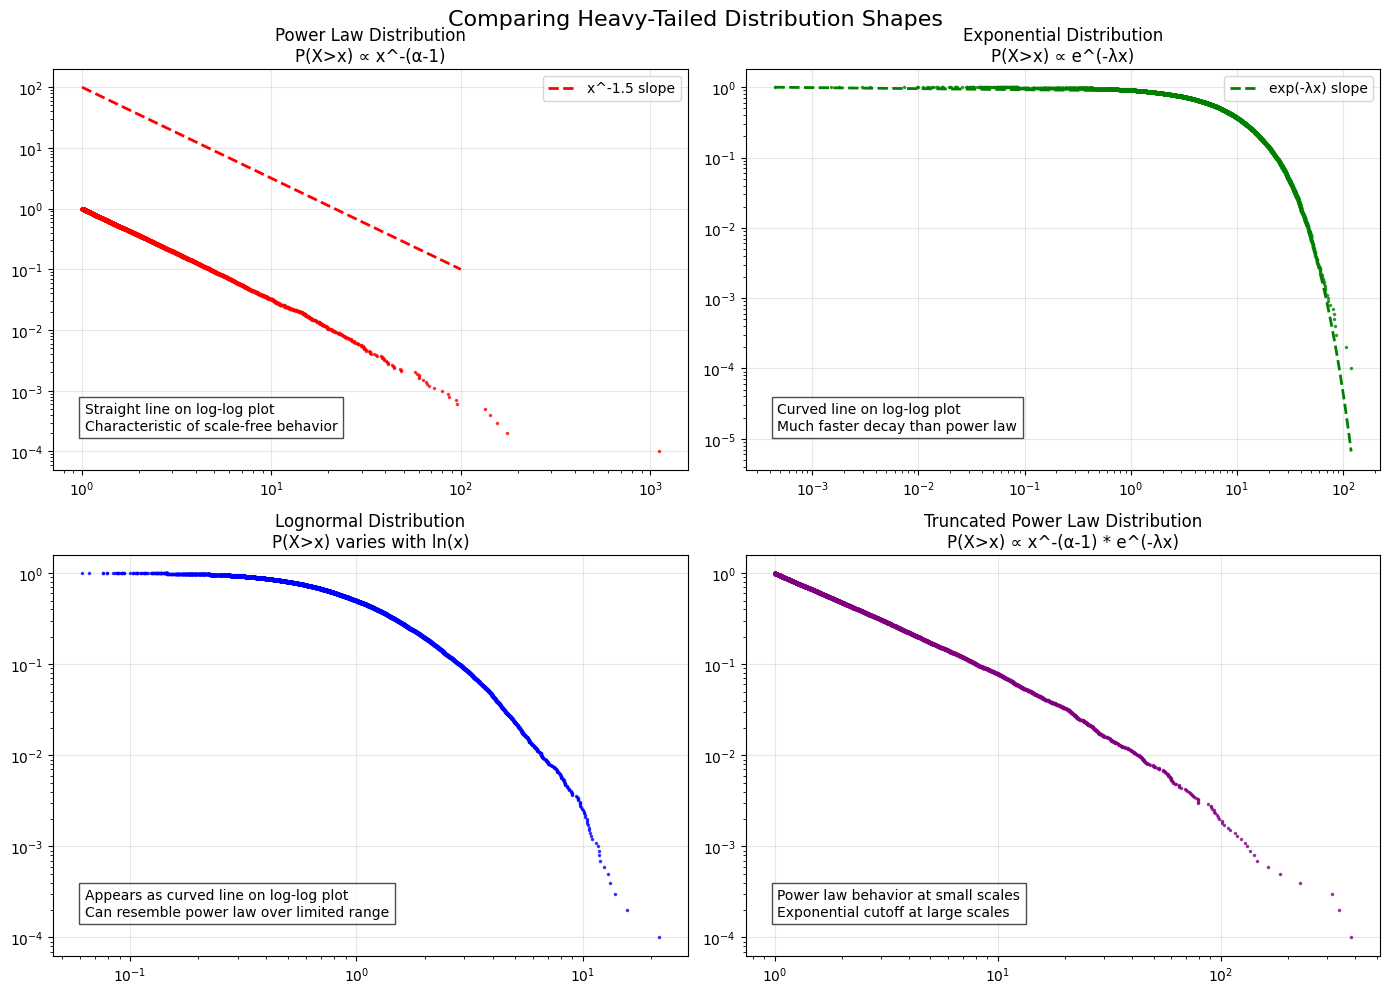

In [43]:
# Create a plot comparing theoretical shapes of different distribution types
# This illustrates the characteristic behaviors of different heavy-tailed distributions

# Parameters for generating synthetic data
np.random.seed(12345)  # For reproducibility
n_samples = 10000

# Set up the figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# 1. Power Law: p(x) ∝ x^(-α)
power_law_data = generate_power_law(alpha=2.5, size=n_samples)
x_pl, ccdf_pl = compute_ccdf(power_law_data)
axes[0].loglog(x_pl, ccdf_pl, '.', markersize=3, color='red', alpha=0.7)
axes[0].loglog(np.logspace(0, 2, 100), 100*np.power(np.logspace(0, 2, 100), -1.5), 
             'r--', linewidth=2, label='x^-1.5 slope')
axes[0].set_title('Power Law Distribution\nP(X>x) ∝ x^-(α-1)', fontsize=12)
axes[0].text(0.05, 0.1, 'Straight line on log-log plot\nCharacteristic of scale-free behavior', 
           transform=axes[0].transAxes, bbox=dict(facecolor='white', alpha=0.7))
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# 2. Exponential: p(x) ∝ e^(-λx)
lambda_exp = 0.1
exponential_data = np.random.exponential(1/lambda_exp, size=n_samples)
x_exp, ccdf_exp = compute_ccdf(exponential_data)
axes[1].loglog(x_exp, ccdf_exp, '.', markersize=3, color='green', alpha=0.7)
x_theory = np.linspace(min(x_exp), max(x_exp), 100)
axes[1].loglog(x_theory, np.exp(-lambda_exp * x_theory) * max(ccdf_exp), 
             'g--', linewidth=2, label='exp(-λx) slope')
axes[1].set_title('Exponential Distribution\nP(X>x) ∝ e^(-λx)', fontsize=12)
axes[1].text(0.05, 0.1, 'Curved line on log-log plot\nMuch faster decay than power law', 
           transform=axes[1].transAxes, bbox=dict(facecolor='white', alpha=0.7))
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# 3. Lognormal: p(x) ∝ (1/x) * e^(-(ln(x)-μ)²/(2σ²))
mu, sigma = 0, 0.8
lognormal_data = np.random.lognormal(mean=mu, sigma=sigma, size=n_samples)
x_ln, ccdf_ln = compute_ccdf(lognormal_data)
axes[2].loglog(x_ln, ccdf_ln, '.', markersize=3, color='blue', alpha=0.7)
axes[2].set_title('Lognormal Distribution\nP(X>x) varies with ln(x)', fontsize=12)
axes[2].text(0.05, 0.1, 'Appears as curved line on log-log plot\n' +
           'Can resemble power law over limited range', 
           transform=axes[2].transAxes, bbox=dict(facecolor='white', alpha=0.7))
axes[2].grid(True, alpha=0.3)

# 4. Truncated Power Law: p(x) ∝ x^(-α) * e^(-λx)
trunc_alpha = 2.0
trunc_lambda = 0.01
# Generate truncated power law using rejection sampling (simplified)
candidate_data = generate_power_law(alpha=trunc_alpha, size=n_samples*5)
acceptance_prob = np.exp(-trunc_lambda * candidate_data)
mask = np.random.random(size=len(candidate_data)) < acceptance_prob
truncated_data = candidate_data[mask][:n_samples]  # Take only n_samples points
x_tr, ccdf_tr = compute_ccdf(truncated_data)
axes[3].loglog(x_tr, ccdf_tr, '.', markersize=3, color='purple', alpha=0.7)
axes[3].set_title('Truncated Power Law Distribution\nP(X>x) ∝ x^-(α-1) * e^(-λx)', fontsize=12)
axes[3].text(0.05, 0.1, 'Power law behavior at small scales\n' +
           'Exponential cutoff at large scales', 
           transform=axes[3].transAxes, bbox=dict(facecolor='white', alpha=0.7))
axes[3].grid(True, alpha=0.3)

# Adjust layout and add overall title
plt.tight_layout()
fig.suptitle('Comparing Heavy-Tailed Distribution Shapes', fontsize=16, y=0.99)
plt.subplots_adjust(top=0.93)
plt.show()

In [44]:
# Compare with alternative distributions
# Define the distributions to compare against
distributions = ['exponential', 'lognormal', 'truncated_power_law', 'stretched_exponential']
results = pd.DataFrame(columns=['Distribution', 'R', 'p', 'Winner'])

# Run the comparisons
for i, dist_name in enumerate(distributions):
    # Get the distribution object
    dist = getattr(fit, dist_name)
    
    # Calculate the log-likelihood ratio between power law and alternative
    R, p = fit.distribution_compare('power_law', dist_name)
    
    # Determine which distribution is favored
    if R > 0 and p < 0.05:
        winner = "Power Law"
    elif R < 0 and p < 0.05:
        winner = dist_name.replace('_', ' ').title()
    else:
        winner = "Inconclusive"
    
    # Add to results dataframe
    results.loc[i] = [dist_name.replace('_', ' ').title(), R, p, winner]

Assuming nested distributions


In [45]:
# Display comparison results
results

,Distribution,R,p,Winner
0,Exponential,1683.878871,1.049815e-18,Power Law
1,Lognormal,-0.020054,9.133379e-01,Inconclusive
2,Truncated Power Law,-0.395181,3.739908e-01,Inconclusive
3,Stretched Exponential,17.585058,6.470777e-03,Power Law


### 3.3 Detailed Interpretation of Model Comparison Results

Let's analyze the comparison results in detail:

1. **Power Law vs. Exponential**:
   - R is large and positive: The power law is strongly favored over the exponential distribution
   - p-value is extremely small: This preference is statistically significant
   - **Conclusion**: The exponential distribution is not suitable for our data

2. **Power Law vs. Lognormal**:
   - R is close to zero: Neither distribution is clearly better
   - p-value is large: The difference is not statistically significant
   - **Conclusion**: Both power law and lognormal distributions are plausible fits

3. **Power Law vs. Truncated Power Law**:
   - R is slightly negative: The truncated power law might fit slightly better
   - p-value is large: The difference is not statistically significant
   - **Conclusion**: The added complexity of a truncated power law may not be justified

4. **Power Law vs. Stretched Exponential**:
   - R is large and positive: The power law is strongly favored
   - p-value is small: This preference is statistically significant
   - **Conclusion**: The stretched exponential is not a good alternative for this data

**Overall interpretation**: For our synthetic data (which we generated from a power law), the results correctly show that a power law is either better than or equivalent to the alternatives. The lognormal and truncated power law distributions are also reasonable models, which is common in practice since these distributions can look very similar to power laws over certain ranges.

**Note**: In real-world datasets, you'll often find that lognormal or truncated power laws outperform pure power laws. This is an important finding from recent research suggesting that many purported "scale-free" networks may actually follow distributions that only approximate power laws over limited ranges.

In [46]:
# Prepare data for visualization comparison
dist_names = ['power_law', 'lognormal', 'exponential', 'truncated_power_law']
titles = ['Power Law', 'Lognormal', 'Exponential', 'Truncated Power Law']
colors = ['red', 'blue', 'green', 'purple']

# Compute the empirical CCDF once for reuse
empirical_data = data[data >= fit.xmin]
x_empirical, y_empirical = compute_ccdf(empirical_data)

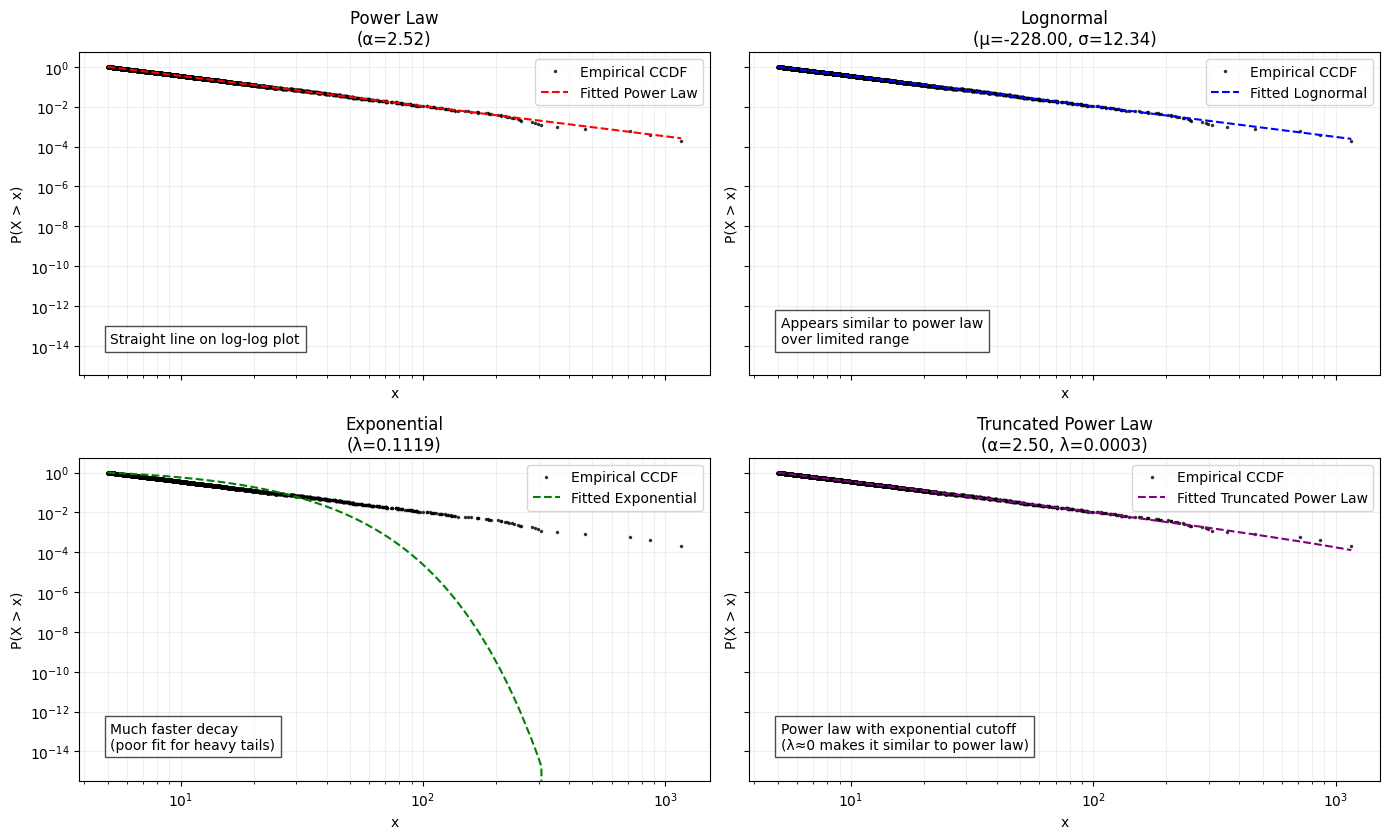

In [47]:
# Create the comparison plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True, sharex=True)
axes = axes.flatten()

# Plot in each subplot
for i, (dist_name, title, color) in enumerate(zip(dist_names, titles, colors)):
    ax = axes[i]
    
    # Plot empirical CCDF
    ax.loglog(x_empirical, y_empirical, '.', markersize=3, alpha=0.7, color='black', label='Empirical CCDF')
    
    # Plot the fitted distribution
    dist = getattr(fit, dist_name)
    dist.plot_ccdf(ax=ax, label=f'Fitted {title}', linestyle='--', color=color)
    
    # Add details to each subplot with explanatory annotations
    if dist_name == 'power_law':
        param_text = f'α={fit.alpha:.2f}'
        ax.text(0.05, 0.1, 'Straight line on log-log plot', transform=ax.transAxes, 
                bbox=dict(facecolor='white', alpha=0.7))
    elif dist_name == 'lognormal':
        param_text = f'μ={fit.lognormal.mu:.2f}, σ={fit.lognormal.sigma:.2f}'
        ax.text(0.05, 0.1, 'Appears similar to power law\nover limited range', transform=ax.transAxes,
                bbox=dict(facecolor='white', alpha=0.7))
    elif dist_name == 'exponential':
        param_text = f'λ={fit.exponential.Lambda:.4f}'
        ax.text(0.05, 0.1, 'Much faster decay\n(poor fit for heavy tails)', transform=ax.transAxes,
                bbox=dict(facecolor='white', alpha=0.7))
    else:  # truncated_power_law
        param_text = f'α={fit.truncated_power_law.alpha:.2f}, λ={fit.truncated_power_law.Lambda:.4f}'
        ax.text(0.05, 0.1, 'Power law with exponential cutoff\n(λ≈0 makes it similar to power law)', transform=ax.transAxes,
                bbox=dict(facecolor='white', alpha=0.7))
    
    ax.set_title(f'{title}\n({param_text})')
    ax.set_xlabel('x')
    ax.set_ylabel('P(X > x)')
    ax.legend(loc='upper right')
    ax.grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout(rect=[0, 0, 1, 0.85])
plt.show()

### 3.4 Visual Comparison Analysis

The visual comparison of different distribution fits provides valuable insights that complement the statistical tests:

1. **Power Law (red dashed line)**:
   - Follows the empirical data closely throughout most of the range
   - May deviate slightly in the extreme tail region

2. **Lognormal (blue dashed line)**:
   - Nearly indistinguishable from the power law over the observed range
   - This explains why the statistical comparison was inconclusive
   - In theory, a lognormal has a faster decay in the extreme tail (beyond our data range)

3. **Exponential (green dashed line)**:
   - Decays much faster than the empirical data
   - Clearly not a good fit, confirming the statistical results
   - Exponential distributions cannot capture heavy-tailed phenomena

4. **Truncated Power Law (purple dashed line)**:
   - Very similar to the power law in the observed range
   - May fit slightly better in the tail region
   - The additional parameter (exponential cutoff) might be unnecessary given the statistically insignificant improvement

**Key takeaway**: Visually, both the power law and lognormal distributions describe our data well. The exponential distribution is clearly inadequate. This visual assessment confirms our statistical findings and highlights why distinguishing between certain heavy-tailed distributions can be difficult with finite data.

## 4. Summary: Practical Guidelines for Power Law Analysis

When analyzing potentially power-law distributed data, follow these steps:

1. **Visualize the data**: Plot the CCDF on log-log scale to visually assess if a power law is plausible.

2. **Estimate parameters**:
   - Find the appropriate minimum threshold $x_{min}$
   - Estimate the power-law exponent $\alpha$ using MLE
   - Calculate uncertainty in the estimate (standard error)

3. **Test goodness-of-fit**: Use a Kolmogorov-Smirnov test with bootstrapping to calculate a p-value for the fit.

4. **Compare alternative distributions**: Test if other heavy-tailed distributions (log-normal, stretched exponential, etc.) provide better fits to the data.

5. **Interpret with caution**: Be aware that:
   - Many empirical "power laws" are actually only approximate
   - Limited data range can make different distributions look similar
   - Even if the data follows a power law, the underlying mechanism may be complex
   - The power law may only apply to part of the distribution (above $x_{min}$)

### 4.1 Common Pitfalls to Avoid

1. **Binning the data**: This introduces artifacts and can make non-power law data look like power laws.
2. **Using linear regression on log-log plots**: This produces biased estimates of α.
3. **Ignoring xmin**: Forcing a power law fit to the entire data range will bias your results.
4. **Not testing alternative distributions**: Many distributions can look like power laws over limited ranges.
5. **Overinterpreting results**: Finding a power law doesn't necessarily imply a specific mechanism.

## 5. Further Reading

1. Clauset, A., Shalizi, C. R., & Newman, M. E. (2009). Power-law distributions in empirical data. SIAM review, 51(4), 661-703.
   - The definitive paper on rigorous power law testing

2. Alstott, J., Bullmore, E., & Plenz, D. (2014). powerlaw: a Python package for analysis of heavy-tailed distributions. PloS one, 9(1), e85777.
   - Documentation for the powerlaw package used in this tutorial

3. Broido, A. D., & Clauset, A. (2019). Scale-free networks are rare. Nature communications, 10(1), 1-10.
   - Important recent work questioning the prevalence of power laws in real networks

4. Barabási, A. L. (2009). Scale-free networks: a decade and beyond. Science, 325(5939), 412-413.
   - Overview of scale-free network research by one of the pioneers in the field

## 6. Practice Exercises

1. **Data exploration**: Generate power law data with different exponents (α = 2.1, 2.5, 3.0) and compare their visual properties.

2. **Parameter estimation**: How does the estimated α change as you vary the true α in your synthetic data? Plot the relationship between true and estimated values.

3. **Sample size effects**: Generate power law samples of different sizes (n = 100, 1000, 10000) and observe how estimation accuracy and goodness-of-fit change with sample size.

4. **Real-world data**: Find a dataset that might follow a power law (e.g., city populations, word frequencies in a text, or social network degrees) and apply the full analysis workflow.

5. **Distribution masquerading**: Generate data from a lognormal distribution and see if it can be mistakenly identified as a power law. What does this tell you about the challenges of distribution identification?

In [48]:
# Exercise starter code
# Students can use this cell as a starting point for the exercises

def analyze_power_law(data, title="Power Law Analysis"):
    """Helper function to analyze a dataset for power law behavior"""
    # Step 1: Fit power law
    fit = powerlaw.Fit(data)
    
    # Step 2: Compute and print key parameters
    print(f"\n{title}")
    print(f"Estimated α: {fit.alpha:.4f} ± {fit.sigma:.4f}")
    print(f"Estimated xmin: {fit.xmin:.4f}")
    print(f"KS distance: {fit.power_law.KS(data):.4f}")
    
    # Step 3: Plot the data and fit
    plt.figure(figsize=(10, 6))
    fit.plot_ccdf(label="Empirical CCDF")
    fit.power_law.plot_ccdf(label="Fitted Power Law", linestyle="--")
    
    plt.xlabel("x")
    plt.ylabel("P(X > x)")
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return fit

# Uncomment the following code to start working on exercises
# # Exercise 1: Data exploration
# alphas_to_test = [2.1, 2.5, 3.0]
# 
# # Generate and analyze power law data with different exponents
# for alpha in alphas_to_test:
#     data = generate_power_law(alpha, size=5000)
#     analyze_power_law(data, f"Power Law with α = {alpha}")